Welcome!

In [1]:
%pip install -r requirements.txt
#pip installs a list of libraries
#list can be found in requirements.txt

#important import names
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import statements til I figure out the other way 
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
nltk.download('punkt')
nltk.download('tagsets')
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

import random

import pandas as pd

from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn import metrics

import json

import csv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from xgboost import XGBClassifier

from tabulate import tabulate

import requests


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [3]:
#import sys
#sys.path.append('.')
#from importables import *
#grabs all imports from import.py

#This is not working but it should be >>>:(


In [4]:

# Load a text file from Project Gutenberg
url = "https://www.gutenberg.org/files/1342/1342-0.txt"  # Example: Pride and Prejudice by Jane Austen
response = requests.get(url)
text = response.text



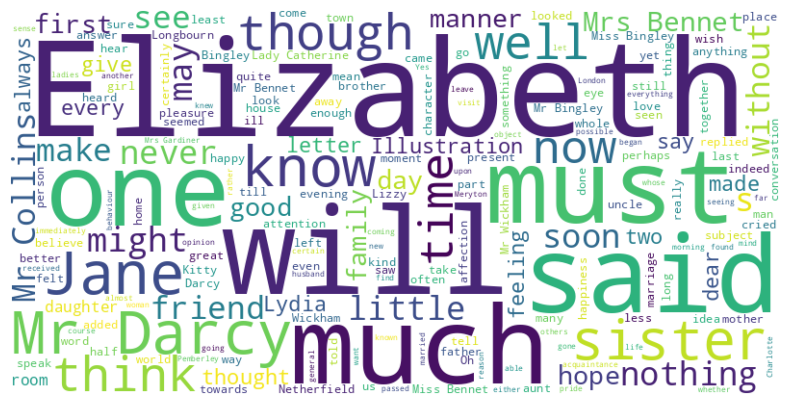

In [5]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df_elife_train = pd.read_parquet('data/Elife/train-00000-of-00001.parquet')
df_elife_test = pd.read_parquet('data/Elife/test-00000-of-00001.parquet')
df_elife_validation = pd.read_parquet('data/Elife/validation-00000-of-00001.parquet')
df_elife_validation.head(5)

,article,summary,section_headings,keywords,year,title
0,Cell-fate reprograming is at the heart of deve...,The DNA in genes encodes the basic information...,"[Abstract, Introduction, Results, Discussion, ...","[developmental, biology]",2016,Increasing Notch signaling antagonizes PRC2-me...
1,"Klebsiella pneumoniae is a respiratory , blood...",Klebsiella pneumoniae is a type of bacteria th...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology, and, infectious, disease, immun...",2020,SKAP2 is required for defense against K. pneum...
2,Plasmodium vivax relapse infections occur foll...,Malaria is one of the world's most deadly infe...,"[Abstract, Introduction, Results, Discussion, ...","[epidemiology, and, global, health]",2014,Modelling the contribution of the hypnozoite r...
3,When 2 Mha of Amazonian forests are disturbed ...,The Amazon rainforest in South America is the ...,"[Abstract, Introduction, Results, Discussion, ...",[ecology],2016,Carbon recovery dynamics following disturbance...
4,Neurosphere formation is commonly used as a su...,Neurons that arise in the adult nervous system...,"[Abstract, Introduction, Results, Discussion, ...","[stem, cells, and, regenerative, medicine]",2014,Prospective identification of functionally dis...


: 

In [ ]:
df_plos_train_1 = pd.read_parquet('data/PLOS/train-00000-of-00003.parquet')
df_plos_train_2 = pd.read_parquet('data/PLOS/train-00001-of-00003.parquet')
#df_plos_train_3 = pd.read_parquet('data/PLOS/train-00002-of-00003.parquet')
#df_plos_test = pd.read_parquet('data/PLOS/test-00000-of-00001.parquet')
#df_plos_validation = pd.read_parquet('data/PLOS/validation-00000-of-00001.parquet')
df_plos_train_2.head(5)
